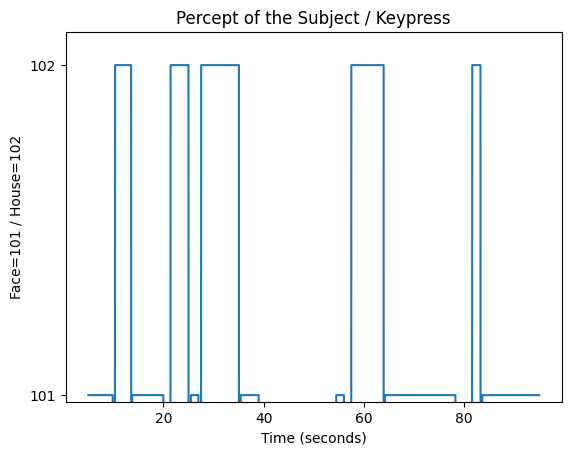

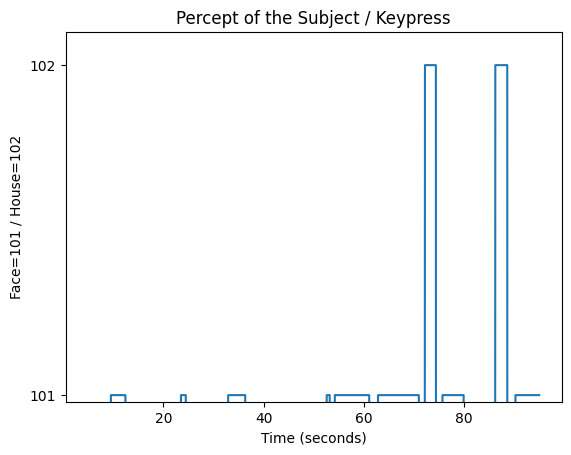

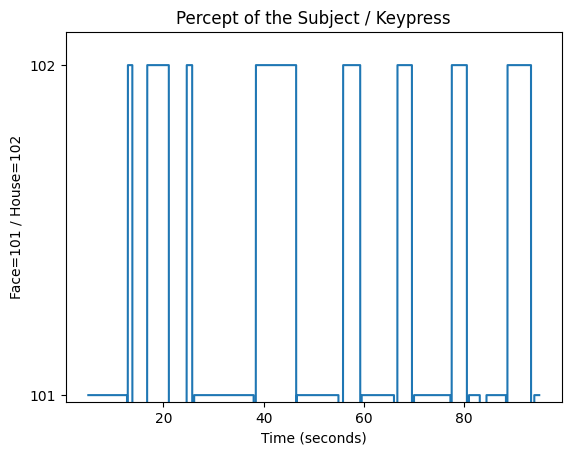

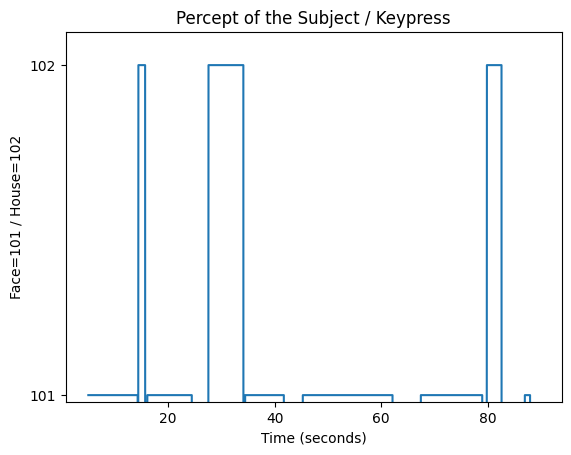

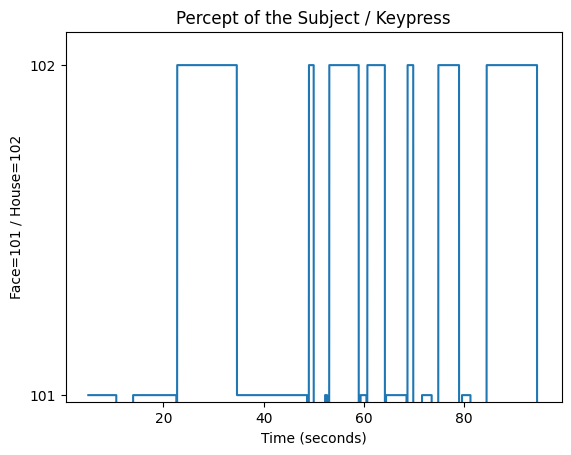

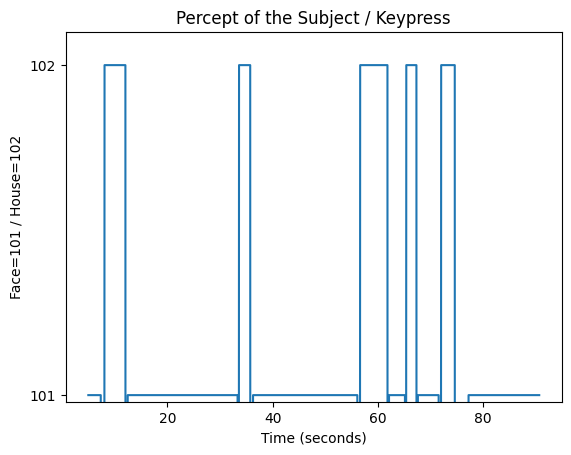

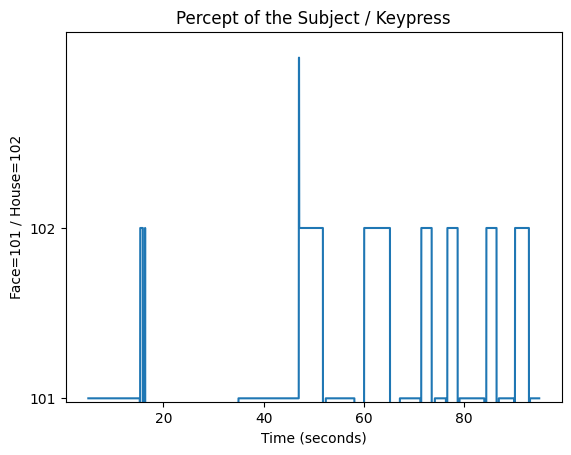

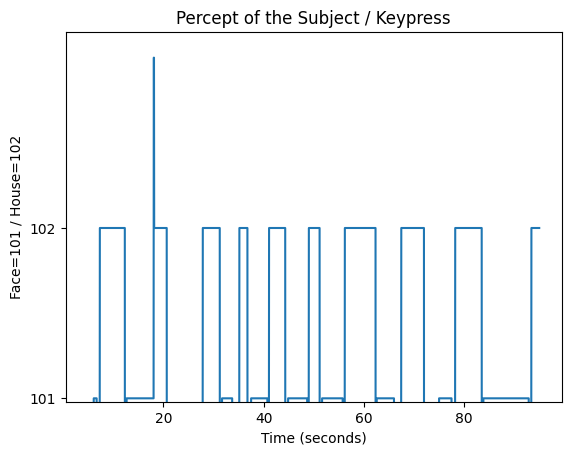

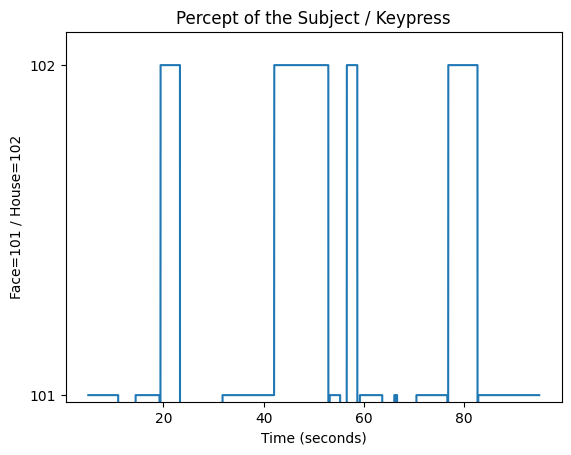

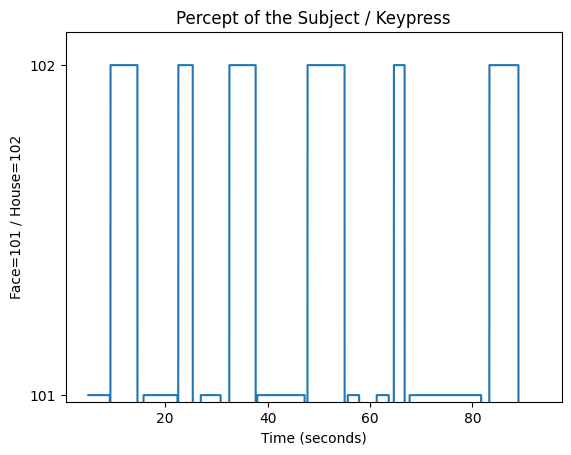

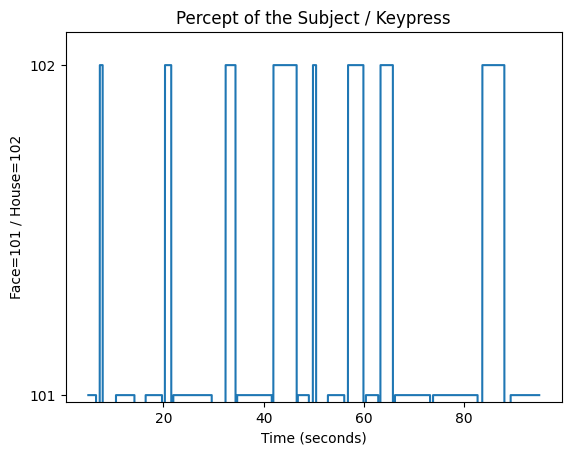

101 percentages of each trial in order:
 [48.16625916870416, 35.71904867748388, 54.34541009113136, 60.480106690375635, 41.920426761502554, 70.70460102244944, 49.32207157146033, 38.27517226050233, 51.70037786174706, 47.45498999777729, 58.857523894198714]
******* 
Trial 1-6 avg:  51.889308735274504
******* 
Trial 7-11 avg:  49.122027117137144
Paired t-test results:
t-statistic: 1.463955817317943
p-value: 0.10852606411093452
Cohen's d: 0.00208675932026121


In [18]:
import csv
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, ttest_ind

def filter_label_changes(x_values, y_values, time_threshold):
    filtered_x = [x_values[0]]
    filtered_y = [y_values[0]]

    for i in range(1, len(x_values)):
        if y_values[i] == filtered_y[-1] and (x_values[i] - filtered_x[-1]) >= time_threshold:
            filtered_x.append(x_values[i])
            filtered_y.append(y_values[i])
        else:
            filtered_x.append(x_values[i])
            filtered_y.append(filtered_y[-1])

    return filtered_x, filtered_y


def plot_filtered_data(x_values, y_values):
    for i in range(len(y_values)):
        plt.plot(x_values, y_values[i])

        plt.xlabel('Time (seconds)')
        plt.yticks([101, 102], ['101', '102'])
        plt.ylim(100.98, plt.ylim()[1])

        plt.ylabel('Face=101 / House=102')
        plt.title('Percept of the Subject / Keypress')

        plt.show()


def main():
    x_values = []
    y_values = [[] for _ in range(11)]

    with open('output_time.csv', 'r') as x_file, open('output_label4.csv', 'r') as y_file:
        x_reader = csv.reader(x_file)
        y_reader = csv.reader(y_file)

        for row in x_reader:
            x_values.append(float(row[0]))

        for row in y_reader:
            for i in range(11):
                y_values[i].append(float(row[i]))

    filtered_x, filtered_y = filter_label_changes(x_values, y_values[0], 0.3)
    plot_filtered_data(filtered_x, y_values)

    trial101 = []
    for trial in y_values:
        trial101.append(float(trial.count(101)) / len(trial) * 100.0)

    print("101 percentages of each trial in order:\n",trial101)
    print("******* \nTrial 1-6 avg: ", float(sum(trial101[:6]))/6)
    print("******* \nTrial 7-11 avg: ", float(sum(trial101[6:]))/5)

    t_statistic, p_value = ttest_rel(trial101[:4] + [trial101[5]], trial101[6:], alternative="greater")

    print("Paired t-test results:")
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)

    n1 = len(trial101[:4] + [trial101[5]])
    n2 = len(trial101[6:])
    mean_diff = sum(trial101[:4] + [trial101[5]]) / n1 - sum(trial101[6:]) / n2
    pooled_std = ((n1 - 1) * (sum((x - mean_diff) ** 2 for x in trial101[:4] + [trial101[5]]) / n1) + (n2 - 1) * (
            sum((x - mean_diff) ** 2 for x in trial101[6:]) / n2)) / (n1 + n2 - 2)
    cohen_d = mean_diff / pooled_std

    print("Cohen's d:", cohen_d)


if __name__ == '__main__':
    main()
